# Assignment Logistic Regression Module 9 "Election.csv"

### Description of the data 

Suppose we are interested in the factors that influence whether a political candidate wins an election.The outcome (response) variable is binary (0/1); win or lose. 
The predictor variables of interest are the amount of money spent on the campaign, 
the amount of time spent campaigning negatively and whether or not the candidate is an incumbent.

In [1]:
df <- read.csv("election_data.csv")

In [2]:
dim(df)

[1] 11  5

In [3]:
df

Election.id,Result,Year,Amount.Spent,Popularity.Rank
<int>,<int>,<int>,<dbl>,<int>
NA,NA,NA,NA,NA
122,0,32,3.81,3
315,1,48,6.32,2
201,1,51,3.67,1
965,0,40,2.93,4
410,1,52,3.60,1
150,0,35,4.20,4
743,1,39,5.66,2
612,1,42,4.32,3


In [4]:
library(dplyr)

Warning message:
"package 'dplyr' was built under R version 3.6.3"

Attaching package: 'dplyr'


The following objects are masked from 'package:stats':

    filter, lag


The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union




In [5]:
glimpse(df) # first row is na

Rows: 11
Columns: 5
$ Election.id     <int> NA, 122, 315, 201, 965, 410, 150, 743, 612, 206, 792
$ Result          <int> NA, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0
$ Year            <int> NA, 32, 48, 51, 40, 52, 35, 39, 42, 44, 50
$ Amount.Spent    <dbl> NA, 3.81, 6.32, 3.67, 2.93, 3.60, 4.20, 5.66, 4.32,...
$ Popularity.Rank <int> NA, 3, 2, 1, 4, 1, 4, 2, 3, 3, 4


In [9]:
sum(is.na(df)) # there is 5 missing NA value lets remove it 

[1] 0

In [8]:
df  <- na.omit(df) # na ommitted 

In [10]:
dim(df)# its ommited row of NA value

[1] 10  5

In [11]:
df# clearly visible , our data set is small 

,Election.id,Result,Year,Amount.Spent,Popularity.Rank
,<int>,<int>,<int>,<dbl>,<int>
2,122,0,32,3.81,3
3,315,1,48,6.32,2
4,201,1,51,3.67,1
5,965,0,40,2.93,4
6,410,1,52,3.60,1
7,150,0,35,4.20,4
8,743,1,39,5.66,2
9,612,1,42,4.32,3
10,206,1,44,3.26,3


## Model making 

In [12]:
attach(df)

In [15]:
model  <- glm(Result~.,data=df,family = binomial)

Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"


In [16]:
print(summary(model))


Call:
glm(formula = Result ~ ., family = binomial, data = df)

Deviance Residuals: 
         2           3           4           5           6           7  
-1.007e-05   2.110e-08   2.110e-08  -6.461e-06   2.110e-08  -2.110e-08  
         8           9          10          11  
 2.110e-08   1.445e-05   7.061e-06  -9.419e-06  

Coefficients:
                  Estimate Std. Error z value Pr(>|z|)
(Intercept)      1.557e+02  5.375e+05   0.000        1
Election.id      4.709e-02  2.247e+02   0.000        1
Year             3.056e+00  1.038e+04   0.000        1
Amount.Spent    -1.362e+01  9.118e+04   0.000        1
Popularity.Rank -7.702e+01  1.319e+05  -0.001        1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 1.3460e+01  on 9  degrees of freedom
Residual deviance: 4.9054e-10  on 5  degrees of freedom
AIC: 10

Number of Fisher Scoring iterations: 25



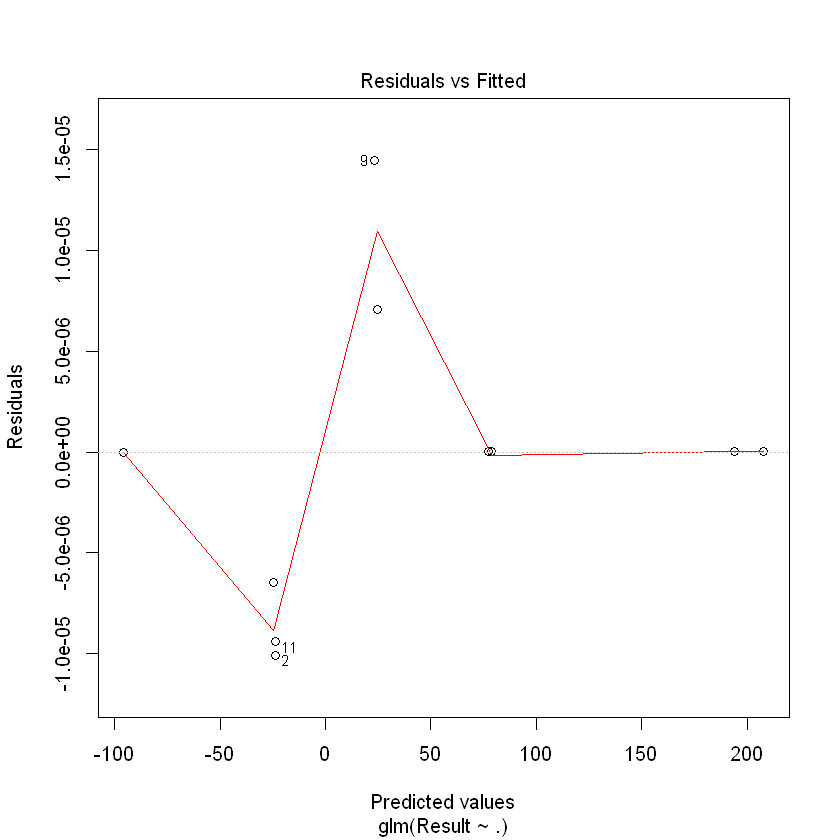

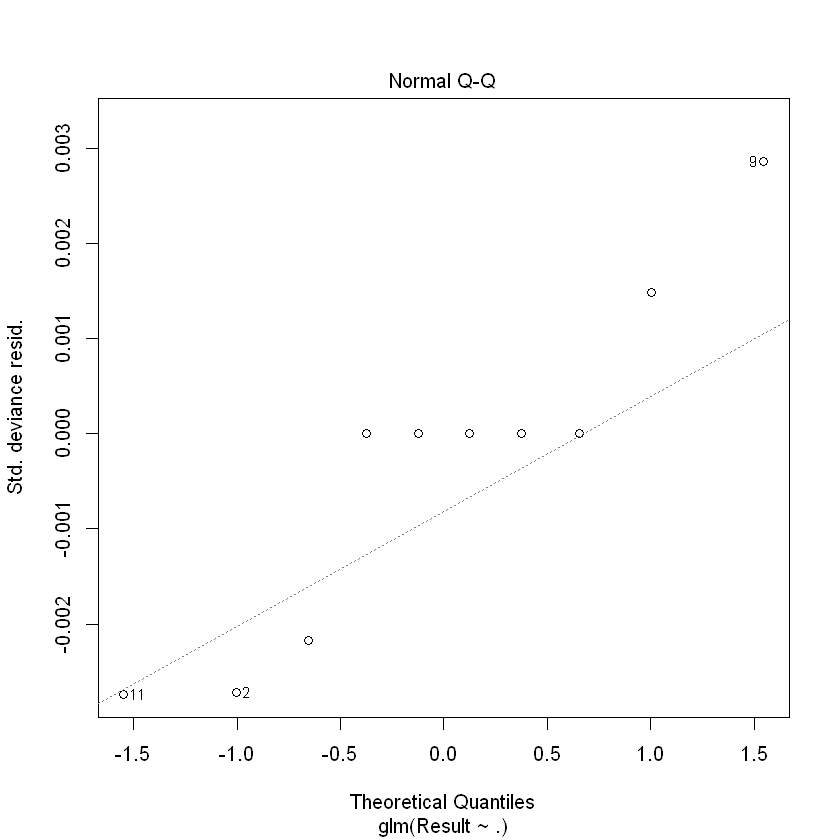

Warning message in sqrt(crit * p * (1 - hh)/hh):
"NaNs produced"
Warning message in sqrt(crit * p * (1 - hh)/hh):
"NaNs produced"


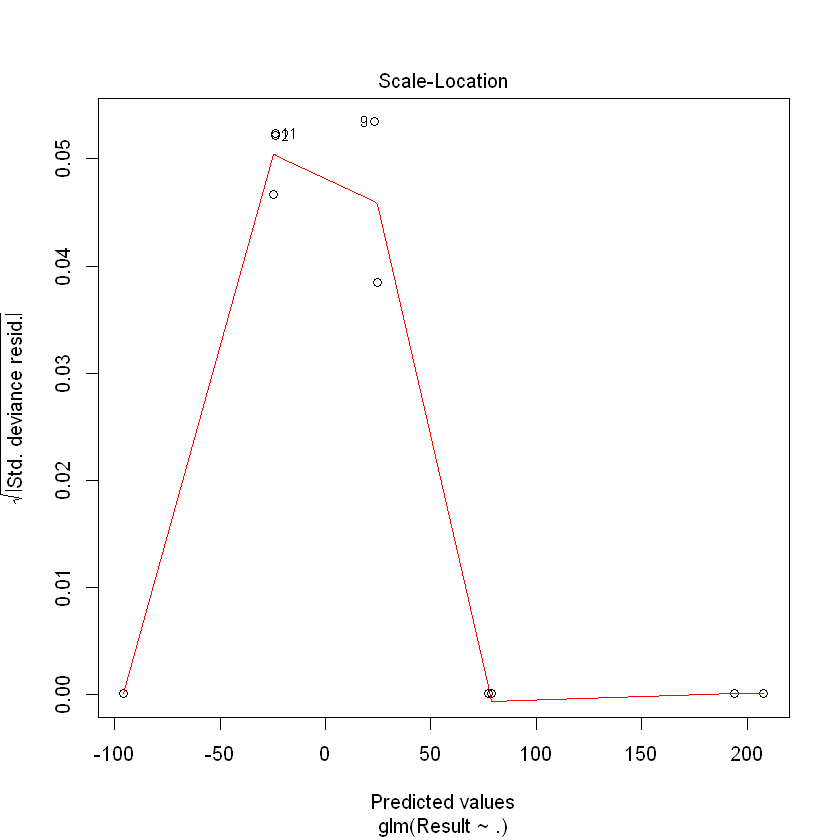

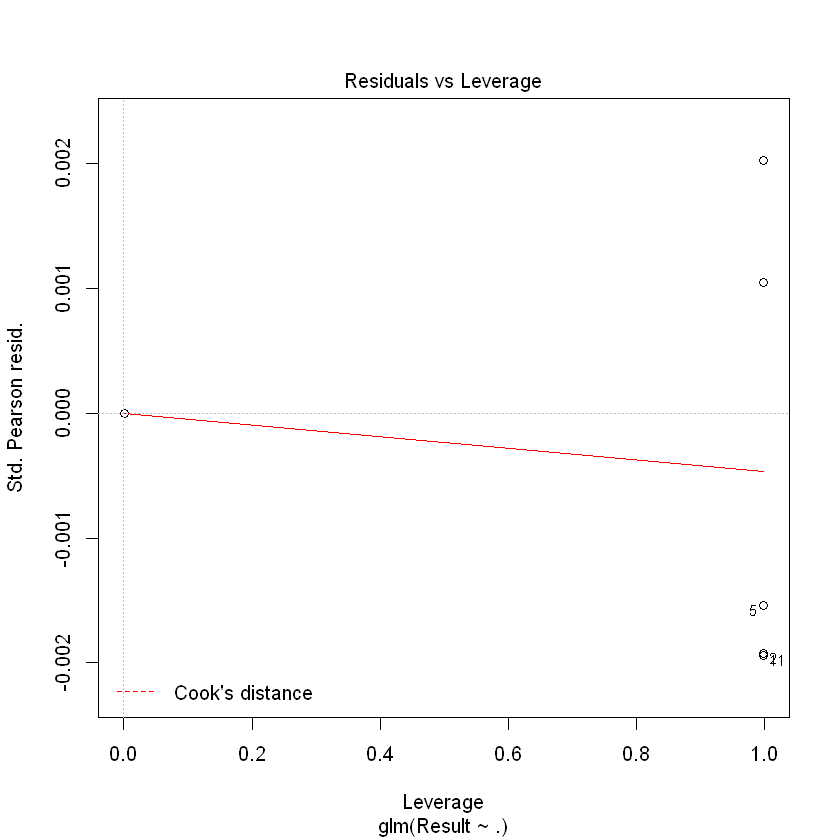

In [17]:
plot(model)

In [18]:
library(caTools)# will use for split our data 
set.seed(101)

split = sample.split(df$Result, SplitRatio = 0.70)

final.train = subset(df, split == TRUE)
final.test = subset(df, split == FALSE)

Warning message:
"package 'caTools' was built under R version 3.6.3"


### Lets Check our probablity and prediction accuracy

In [19]:
fitted.probabilities <- predict(model,newdata=final.test,type='response')

In [21]:
head(fitted.probabilities)

6            7            9 
1.000000e+00 2.220446e-16 1.000000e+00

In [22]:
fitted.results <- ifelse(fitted.probabilities > 0.5,1,0)
yes_no  <- ifelse(fitted.probabilities > 0.5, "Yes","No")

In [23]:
head(fitted.results) # will give result 0 or 1

6 7 9 
1 0 1

In [24]:
misClasificError <- mean(fitted.results != final.test$Result)

### Accuracy sencitivity and pecificity

In [32]:
print(paste('Accuracy',1-misClasificError)) # accuracy of our model is not so good means 100%

[1] "Accuracy 1"


In [35]:
threshold=0.5
predicted_values<-ifelse(predict(model,type="response")>threshold,1,0)
actual_values<-model$y
conf_matrix<-table(predicted_values,actual_values)
conf_matrix

                actual_values
predicted_values 0 1
               0 4 0
               1 0 6

In [36]:
library('caret')

Warning message:
"package 'caret' was built under R version 3.6.3"
Loading required package: lattice

Loading required package: ggplot2

Warning message:
"package 'ggplot2' was built under R version 3.6.3"


In [37]:
sensitivity(conf_matrix)

[1] 1

In [38]:
specificity(conf_matrix)

[1] 1

## Roc Curve

In [39]:
library(Epi)

Warning message:
"package 'Epi' was built under R version 3.6.3"


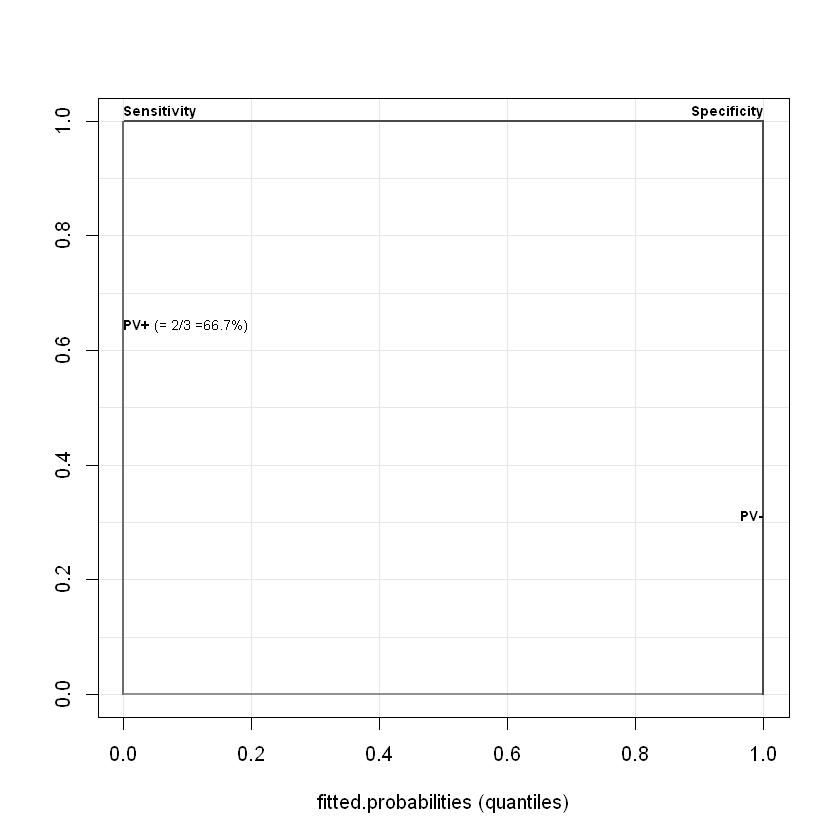

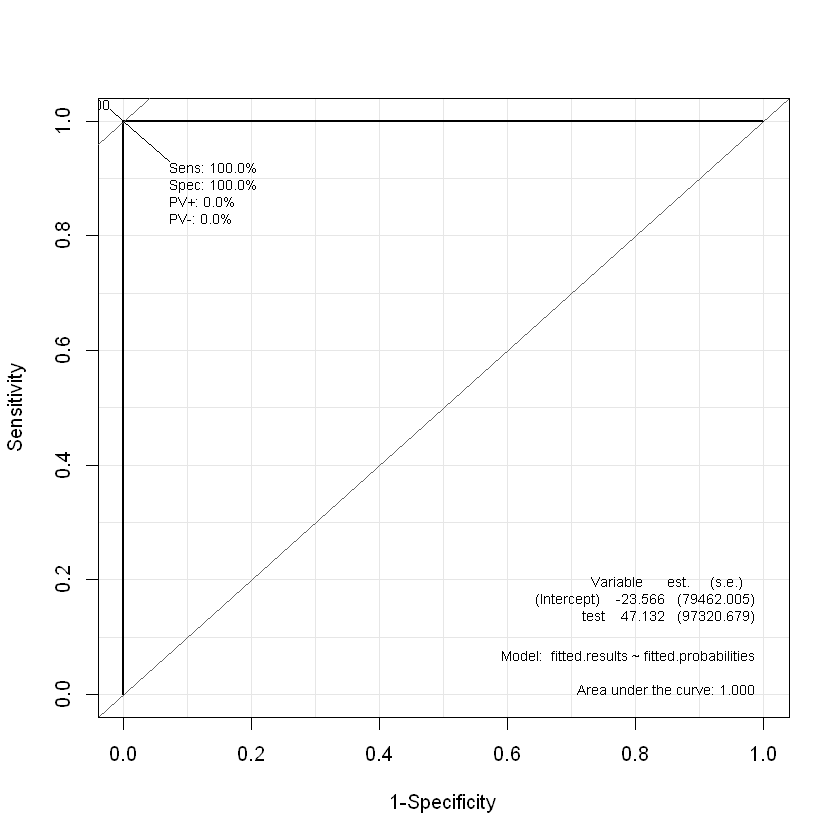

In [40]:
ROC(fitted.probabilities,fitted.results)

In [42]:
#lets check coefficient of our model
exp(coef(model))

(Intercept)     Election.id            Year    Amount.Spent Popularity.Rank 
   4.267031e+67    1.048218e+00    2.124163e+01    1.213536e-06    3.547573e-34